# CE4145: Text Classification - Comparative Pipelines
This notebook implements a comparative evaluation of three text classification pipelines on the “Sentiment Labelled Sentences” datasets (Amazon, IMDb, Yelp).

I acknowledge use of OpenAI ChatGPT from chatgpt.com to  plan, research and generate ideas for the content and 
structure, or on how to improve the work. I entered the following prompts on [21.10.25-30.10.25]: 

1. "Im not sure which algorithms I should be using for my NLP coursework. The brief says to compare two different pipelines, but doesnt really specify which algorithms to use. I dont want to pick something thats too advanced or irrelevant. What would make sense for text classification?"

"That’s a great question — and you’re thinking about it in the right way. For this kind of task, you want two algorithms that are different enough to compare meaningfully, but not so complex that they’re outside the scope of what’s been taught.

Since your project is focused on text classification, the most sensible and interpretable baseline choice would be Multinomial Naïve Bayes (MNB). It’s fast, lightweight, and works really well with word-frequency representations like TF–IDF.

For your second pipeline, a good contrasting approach would be a Linear Support Vector Machine (SVM). It’s fundamentally different from Naïve Bayes — instead of estimating probabilities, it learns a decision boundary that separates positive and negative examples.

Both models are widely used in NLP, both are covered in most university-level machine learning content, and both work very well with the kinds of vectorised features you’ll be using. This gives you a fair, balanced comparison between a probabilistic and a geometric model — exactly what your brief is asking for."



2. "I dont really understand how to create a virtual environment or what it even does. I know its something to do with Python projects, but can you explain what its for and give me the exact steps to make one?"

"Of course! A virtual environment (often called a “venv”) is like a little isolated box where your project’s Python packages live. It keeps everything separate so that installing one version of a library for one project doesn’t mess up another project on your computer.

It’s not strictly required for every small project, but it’s a really good habit — especially for coursework like this. It means your dependencies are consistent, your code is reproducible, and you can share your setup with others (like your lecturer) without breaking anything.

Here’s exactly how to make and activate one:

On Windows (Command Prompt):

py -3.11 -m venv .venv  
.\venv\Scripts\activate


Once you run the first line, Python creates a folder called .venv that holds everything your project needs. The second line activates it, which means your terminal will now show something like (venv) before the path — that’s how you know it worked.

If you’re using PowerShell, you might need to run this instead (because it handles scripts differently):

.\venv\Scripts\Activate.ps1


And if you’re on Mac or Linux, use:

python3 -m venv .venv  
source .venv/bin/activate


After that, you can install all your dependencies (like pandas, numpy, sklearn, etc.) into your virtual environment using:

pip install -r requirements.txt


Every time you open a new terminal, remember you’ll need to activate the environment again before running the notebook or your Python scripts — otherwise, your packages won’t be found."

3. "My virtual environment isnt activating in VS Code. What command should I use on Windows?"

"If you’re using Command Prompt, try:

py -3.11 -m venv .venv  
.\venv\Scripts\activate


For PowerShell, use:

.\venv\Scripts\Activate.ps1"

4. "I keep getting a shape error when I try to fit my model. It says something like “found input variables with inconsistent numbers of samples”. I’m using TF–IDF and Naïve Bayes - what does that mean and how do I fix it?"

"That error usually means your feature matrix (X_train) and labels (y_train) don’t have the same number of rows. It can happen if you split your data incorrectly or reset the index for only one of them.

Try checking this:

print(X_train.shape, y_train.shape)


If the first numbers don’t match, you’ll need to align them. Make sure you’re splitting both X and y at the same time like this:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


That keeps them synced. After that, your model.fit(X_train, y_train) line should work fine."



5. "I need to write a README explaining how to set up and run my project. What should I include?"

"Include setup instructions for the virtual environment, installation of dependencies, and how to open your notebook. Example:

Create a virtual environment

Install from requirements.txt

Run jupyter notebook and open your .ipynb file."





 All of the above content was used to help decide which algorithm models to choose for my model, how to create and implement a virtual environment (venv- which in the end wasnt actually implemented), bugs related to fitting the models, what content and description to put inside my readme folder, and how to activate my venv.

 6. "Can you show me generally how I would implement sentence embeddings in Python for my sentiment analysis project?" 

 “You can use the sentence-transformers library. The typical workflow is: import the model, load a pre-trained embedding model such as all-MiniLM-L6-v2, and then encode your list of sentences into dense vectors. The model will output a numerical matrix where each row represents one sentence. After that, you can pass the resulting vectors into any classifier that accepts dense inputs. Many students start with k-NN, logistic regression, or an SVM configured for dense features. Remember to keep the embedding step separate from the classifier so you can reuse the vectors.”

## Introduction
The main goal of this report is to create, analysis, improve and compare multiple Natural Language Processing (NLP) pipelines for sentence-level sentiment classification. The dataset that was chosen is the Sentiment Labelled Sentences collection, which contains short customer-review sentences sourced from Amazon, Yelp, and IMDb. The datatset has 1000 entries each for the three services. Each sentence is annotated with a binary sentiment label: 1 for positive and 0 for negative. The dataset is suitable for this task because the sentences are verly cleary positive or negative, concise, domain-diverse, and already labelled, allowing direct experimentation with multiple machine learning approaches.

The task requires converting raw text into structured numerical representations, selecting appropriate learning algorithms, and evaluating their effectiveness. This dataset is specifically useful for comparative analysis because the language used across the three sources varies in tone and style by nature of what the reviews are based on, enabling the assessment of how different models generalise across mixed domains. The short and concise length of each example also makes it ideal for experimenting with both basic word count features and modern sentence level character embeddings.

Before modelling began, it was important to preprocess the dataset to ensure accurate training. This preprocessing method included: lowercasing, removal of non-alphanumeric characters, whitespace normalisation, and elimination of empty strings. Stratified train-validation-test splits were used to maintain balanced class proportions across all partitions. This solid foundation enables a a fair and even platform for comparison of different NLP pipelines under consistent experimental conditions.


## Section 2: Representation Learning
Changing raw text into numerical features is very important as machine learning algorithms cannot function directly on unstructured language. In this project, two distinct representation learning approaches were used to enable comparison between sparse word-level features and dense semantic features.

The first representation uses TF–IDF (Term Frequency–Inverse Document Frequency). Both word-level TF-IDF (unigrams and bigrams) and character-level TF-IDF (character n-grams) were created. TF-IDF assigns weights to terms based on how frequently they appear and the words overall distinctiveness within the dataset. Word-level features capture explicit word-level sentiment cues such as: “great” or “terrible”, while character-level features help model subword information, handling misspellings, punctuation differences, and variations in how different people type. This representation results in high-dimensional sparse matrices, which are well-suited to linear models.

The second representation applies modern sentence embeddings, using a pre-trained transformer-based model (MiniLM). Instead of relying on surface forms or local n-grams, embeddings encode semantic information, mapping sentences into dense vectors where similar meanings cluster together. This representation is compact, continuous, and accurately reflects conceptual relationships that TF-IDF cannot capture.

When together, these representations allow comparison between classical bag-of-words style features and more modern embedding-based semantic features. As such, this provides a broader understanding of how different models perform when they are given fundamentally different types of input signals.



## Section 3: Algorithms
Four models were created to allow comparison across probabilistic, linear, neural, and similarity-based approaches. Each model interacts differently with the chosen representations, which in hand allows an understanding of how inductive biases and feature types influence performance.

1. Multinomial Naïve Bayes (MNB)

MNB is a commonly used baseline for text classification. It assumes word occurrences are conditionally independent given the class label and models class likelihoods using multinomial distributions. Even though MNB applies its simplifying assumptions, it often performs suprisingly well on short texts due to the strong influence of indicator words that go hand in hand with sentiment. MNB was trained using word-level TF-IDF features, where count-style representations align well with its probabilistic formulation. The strengths of MNB include very fast training and good baseline reliability, though it struggles when sentiment depends on subtle multi-word interactions.

2. Linear Support Vector Machine (SVM)

The linear SVM attempts to find a decision line that separates positive and negative classes while maximising the margin between them. Linear SVMs are particularly effective in high-dimensional text spaces, where most features are sparse and uncorrelated. Both word-level and character-level TF-IDF representations were tested, with character n-grams providing the strongest results. Character-level features allow SVMs to capture sentiment-bearing patterns that are not prohibitally tied to full words. Hyperparameter tuning was used as well by evaluating several values of the regularisation parameter C to find the the best trade-off between margin maximisation and misclassification cost.

3. Multi-Layer Perceptron (MLP) Neural Network

The MLP represents a non-linear approach to the same TF-IDF feature space. It applies one or more fully connected hidden layers with activation functions that allow the model to combine features in more complex ways than linear models. The set up used a hidden layer of 128 units with ReLU activation and the Adam optimiser. It was also very important to stop early, which prevented overfitting since the dataset being used is relatively small in size. Despite using tuning and regularisation settings, the overall performance still plateaued around 80%. This behaviour aligns with expectations: neural networks typically benefit from dense, low-dimensional embedding inputs, whereas sparse TF-IDF vectors can make it harder for them to learn useful patterns.

4. k-Nearest Neighbours (k-NN) with Sentence Embeddings

To evaluate a fundamentally different modelling approach, semantic embeddings were paired with a k-NN classifier. Using MiniLM embeddings, each sentence is represented as a point in semantic space. The k-NN algorithm classifies a new sample by checking the closest labelled examples under a cosine-distance metric. This non-parametric method is simple by concept and takes advantage of the strengths of embeddings, which means it requires no explicit training. It often performs well when embedding quality is high. In this project, k-NN achieved performance comparable to the MLP. This proves that dense semantic features can compensate for the simplicity of the classifier.

These four models offer a wide contrast in inductive biases: probabilistic vs. geometric, linear vs. non-linear, and parametric vs. non-parametric. When all of these are combined, it showcases a robust analysis of how different modelling approaches handle sentiment classification under varying feature representations.






## Section 4: Evaluation

All models were evaluated using a consistent train-validation-test split. This guarantees fair comparison. Key metrics included accuracy and weighted F1 score, which were chosen because the dataset is balanced and F1 provides insight into per-class performance. Confusion matrices and classification reports were generated to visualise errors and highlight any key distinctions between positive and negative predictions.

MNB produced the weakest results, which is because of its limitations with nuanced or context-dependent sentiment cues. The MLP performed decently, reaching around 80% accuracy, but further tuning showed basically no difference. This highlights the incompatibility between sparse TF-IDF vectors and neural architectures designed for dense representations.

The strongest model was the character-level TF-IDF SVM, achieving the highest accuracy and F1 scores on both validation and test sets. This is not suprising as it aligns with already popular findings that SVMs excel in high-dimensional sparse spaces and benefit from character n-gram stability especially across different domains.

The embedding-based k-NN approach achieved competitive performance, showing the value of dense semantic representations even with a simple classifier.

Overall, the evaluation shows that more traditional models have a slight edge over neural networks on sparse textual features, whereas embedding-based pipelines are more effective when more descriptive, semantic detail is needing to be collected.”

In [55]:
%matplotlib inline
import os, re
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay

Configuration and constants

In [56]:
ROOT = Path.cwd()
DATA_DIR = ROOT / "data"
if not DATA_DIR.exists():
    DATA_DIR = ROOT / "ce4145_project" / "data"
assert DATA_DIR.exists(), f"Couldn't find data folder under {ROOT}"
DATA_FILE = str(DATA_DIR)
print("Using data from:", DATA_FILE)

Using data from: c:\Users\natha\Downloads\ce4145_project\data


In [57]:
def load_dataset(file_path: str) -> pd.DataFrame:
    def _load_one(path):
        df = pd.read_csv(path, sep="\t", header=None, names=["text","label"])
        df["label"] = pd.to_numeric(df["label"], errors="coerce")
        df = df.dropna(subset=["label"])
        df["label"] = df["label"].astype(int)
        df["text"]  = df["text"].astype(str).str.strip()
        return df

    if os.path.isdir(file_path):
        frames, names = [], []
        for fname in os.listdir(file_path):
            if fname.lower().endswith("_labelled.txt"):
                frames.append(_load_one(os.path.join(file_path, fname)))
                names.append(fname)
        if not frames:
            raise ValueError(f"No *_labelled.txt files found in {file_path}")
        print("[INFO] Loaded files:", ", ".join(sorted(names)))
        df = pd.concat(frames, ignore_index=True)
    else:
        df = _load_one(file_path)
    df = df[df["text"] != ""].reset_index(drop=True)
    return df

Section 1: Dataset loading and exploration

In [58]:
df = load_dataset(DATA_FILE)
print(df.shape)
df.head()

[INFO] Loaded files: amazon_cells_labelled.txt, imdb_labelled.txt, yelp_labelled.txt
(2748, 2)


,text,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


label
1    1386
0    1362
Name: count, dtype: int64


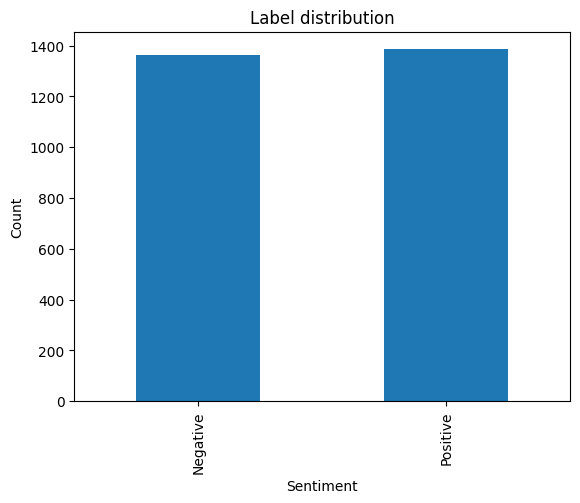

In [59]:
print(df["label"].value_counts())
ax = (df["label"].map({0:"Negative",1:"Positive"})
            .value_counts().sort_index().plot.bar(title="Label distribution"))
ax.set_xlabel("Sentiment"); ax.set_ylabel("Count"); plt.show()

Load the dataset from a single TSV file or from a directory.

In [60]:
def simple_clean(s: str) -> str:
    s = s.lower()
    s = re.sub(r"[^a-z0-9' ]+", " ", s)  # keep letters, digits, apostrophes, spaces
    s = re.sub(r"\s+", " ", s).strip()
    return s

df["text_clean"] = df["text"].apply(simple_clean)
df = df[df["text_clean"] != ""].reset_index(drop=True)
df[["text","text_clean","label"]].head()

,text,text_clean,label
0,So there is no way for me to plug it in here i...,so there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",good case excellent value,1
2,Great for the jawbone.,great for the jawbone,1
3,Tied to charger for conversations lasting more...,tied to charger for conversations lasting more...,0
4,The mic is great.,the mic is great,1


In [61]:
RANDOM_STATE = 42
X = df["text_clean"].values
y = df["label"].values

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_STATE, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=RANDOM_STATE, stratify=y_temp
)
print(f"Split sizes → Train:{len(X_train)}, Val:{len(X_val)}, Test:{len(X_test)}")

Split sizes → Train:2198, Val:275, Test:275


Basic cleanup: drop wholly empty texts and strip whitespace

=== VAL (Word TF-IDF + MNB) ===
Acc:0.8109  F1(w):0.8108

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       136
           1       0.80      0.83      0.82       139

    accuracy                           0.81       275
   macro avg       0.81      0.81      0.81       275
weighted avg       0.81      0.81      0.81       275



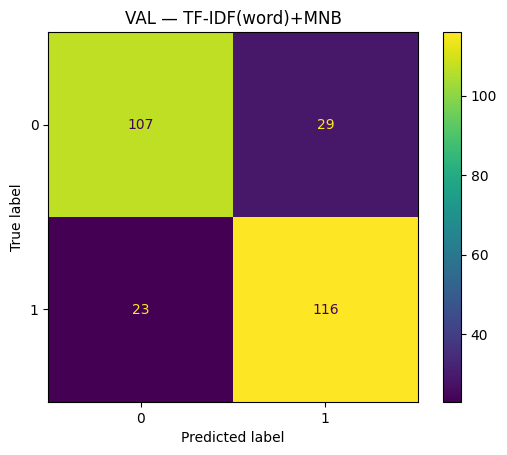

In [62]:
tfidf_word = TfidfVectorizer(ngram_range=(1,2), stop_words="english", min_df=2, max_df=0.95)
Xtr_w = tfidf_word.fit_transform(X_train)
Xva_w = tfidf_word.transform(X_val)
Xte_w = tfidf_word.transform(X_test)

nb = MultinomialNB().fit(Xtr_w, y_train)

predA = nb.predict(Xva_w)
accA  = accuracy_score(y_val, predA)
f1A   = f1_score(y_val, predA, average="weighted")
print(f"=== VAL (Word TF-IDF + MNB) ===\nAcc:{accA:.4f}  F1(w):{f1A:.4f}\n")
print(classification_report(y_val, predA))
ConfusionMatrixDisplay.from_predictions(y_val, predA); plt.title("VAL — TF-IDF(word)+MNB"); plt.show()

=== VAL (Char TF-IDF + SVM) ===
Acc:0.8327  F1(w):0.8326

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       136
           1       0.85      0.81      0.83       139

    accuracy                           0.83       275
   macro avg       0.83      0.83      0.83       275
weighted avg       0.83      0.83      0.83       275



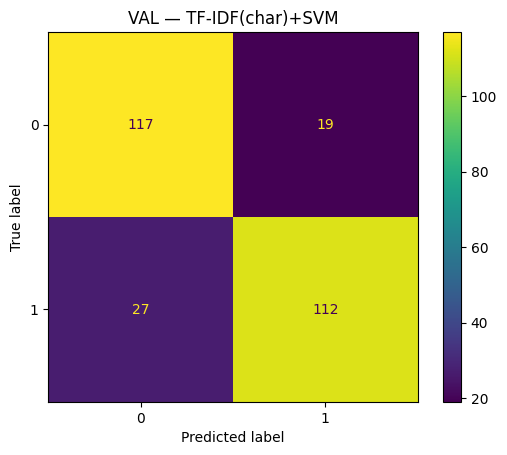

In [63]:
tfidf_char = TfidfVectorizer(analyzer="char", ngram_range=(3,5), min_df=2, max_df=0.95)
Xtr_c = tfidf_char.fit_transform(X_train)
Xva_c = tfidf_char.transform(X_val)
Xte_c = tfidf_char.transform(X_test)

svm = LinearSVC(random_state=RANDOM_STATE).fit(Xtr_c, y_train)

predB = svm.predict(Xva_c)
accB  = accuracy_score(y_val, predB)
f1B   = f1_score(y_val, predB, average="weighted")
print(f"=== VAL (Char TF-IDF + SVM) ===\nAcc:{accB:.4f}  F1(w):{f1B:.4f}\n")
print(classification_report(y_val, predB))
ConfusionMatrixDisplay.from_predictions(y_val, predB); plt.title("VAL — TF-IDF(char)+SVM"); plt.show()

C=0.1: val accuracy=0.8255
C=0.5: val accuracy=0.8327
C=1.0: val accuracy=0.8327
C=2.0: val accuracy=0.8291

[INFO] Best C on validation set: 0.5 (acc=0.8327)

=== VAL (Char TF-IDF + tuned LinearSVC) ===
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       136
           1       0.85      0.81      0.83       139

    accuracy                           0.83       275
   macro avg       0.83      0.83      0.83       275
weighted avg       0.83      0.83      0.83       275



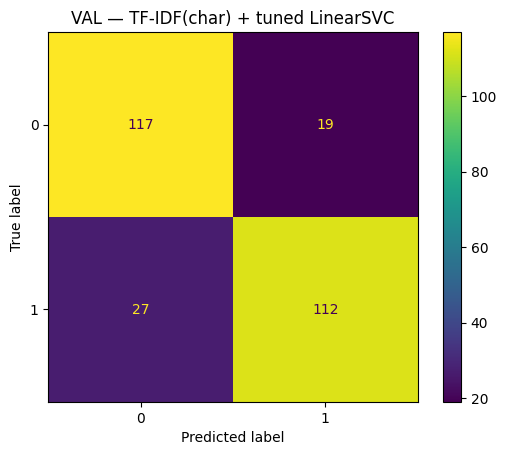

In [ ]:

# Small SVM tuning: try a few C values and pick the best

from sklearn.svm import LinearSVC

best_svm = None
best_acc = -1
best_C   = None

for C in [0.1, 0.5, 1.0, 2.0]:
    svm_temp = LinearSVC(C=C, random_state=RANDOM_STATE)
    svm_temp.fit(Xtr_c, y_train)
    pred_val = svm_temp.predict(Xva_c)
    acc_val  = accuracy_score(y_val, pred_val)

    print(f"C={C}: val accuracy={acc_val:.4f}")

    if acc_val > best_acc:
        best_acc = acc_val
        best_C = C
        best_svm = svm_temp

print(f"\n[INFO] Best C on validation set: {best_C} (acc={best_acc:.4f})")

# Use best_svm as the tuned SVM model
predB_tuned = best_svm.predict(Xva_c)
print("\n=== VAL (Char TF-IDF + tuned LinearSVC) ===")
print(classification_report(y_val, predB_tuned))
ConfusionMatrixDisplay.from_predictions(y_val, predB_tuned)
plt.title("VAL — TF-IDF(char) + tuned LinearSVC")
plt.show()

In [65]:
test_predB = best_svm.predict(Xte_c)
print("=== TEST (Char TF-IDF + tuned LinearSVC) ===")
print(f"Acc: {accuracy_score(y_test, test_predB):.4f}")
print(f"F1(w): {f1_score(y_test, test_predB, average='weighted'):.4f}")

=== TEST (Char TF-IDF + tuned LinearSVC) ===
Acc: 0.8727
F1(w): 0.8726


=== VAL (Word TF-IDF + MLP) ===
Acc:0.7964  F1(w):0.7963

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       136
           1       0.81      0.78      0.79       139

    accuracy                           0.80       275
   macro avg       0.80      0.80      0.80       275
weighted avg       0.80      0.80      0.80       275



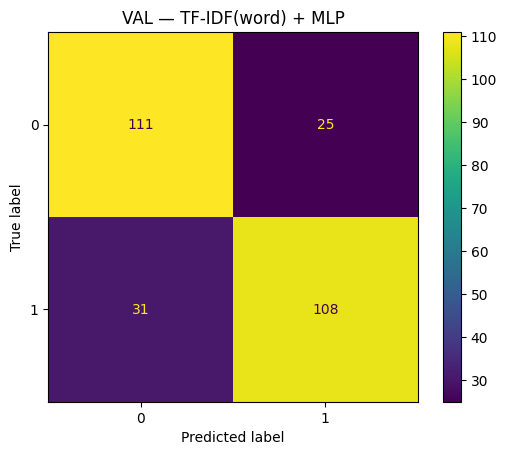

In [ ]:
# Pipeline 3: Word TF-IDF + Neural Network (MLPClassifier)

from sklearn.neural_network import MLPClassifier

RANDOM_STATE = 42

# I am re-using the existing word-level TF-IDF features:
#   Xtr_w, Xva_w, Xte_w
#   y_train, y_val, y_test

mlp = MLPClassifier(
    hidden_layer_sizes=(128,),   # one hidden layer with 128 neurons
    activation="relu",
    solver="adam",
    random_state=RANDOM_STATE,
    max_iter=30,
    early_stopping=True,         # use an internal validation split for early stopping
    n_iter_no_change=5,
    validation_fraction=0.1
)

mlp.fit(Xtr_w, y_train)

predC = mlp.predict(Xva_w)
accC  = accuracy_score(y_val, predC)
f1C   = f1_score(y_val, predC, average="weighted")

print(f"=== VAL (Word TF-IDF + MLP) ===\nAcc:{accC:.4f}  F1(w):{f1C:.4f}\n")
print(classification_report(y_val, predC))

ConfusionMatrixDisplay.from_predictions(y_val, predC)
plt.title("VAL — TF-IDF(word) + MLP")
plt.show()

In [67]:
 # evaluate MLP on the held-out test set
test_predC = mlp.predict(Xte_w)
print(f"=== TEST (Word TF-IDF + MLP) ===")
print(f"Acc: {accuracy_score(y_test, test_predC):.4f}")
print(f"F1(w): {f1_score(y_test, test_predC, average='weighted'):.4f}")

=== TEST (Word TF-IDF + MLP) ===
Acc: 0.8036
F1(w): 0.8036


=== VAL (Improved MLP) ===
Acc: 0.7964   F1(w): 0.7963

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       136
           1       0.81      0.78      0.79       139

    accuracy                           0.80       275
   macro avg       0.80      0.80      0.80       275
weighted avg       0.80      0.80      0.80       275



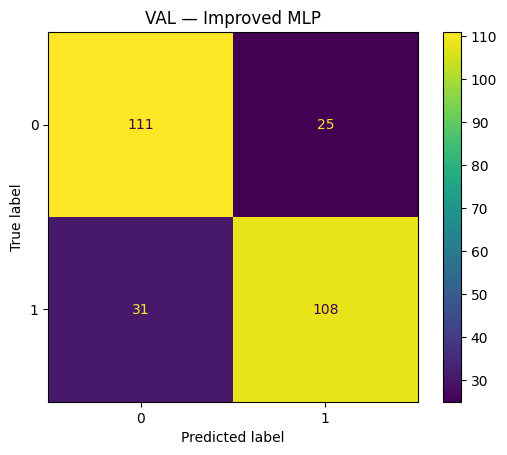

In [ ]:
# Trying an improved/tuned MLP with more training

mlp2 = MLPClassifier(
    hidden_layer_sizes=(128,),
    activation="relu",
    solver="adam",
    random_state=RANDOM_STATE,
    max_iter=100,          # more iterations than before
    early_stopping=True,
    n_iter_no_change=5,
    validation_fraction=0.1
)

mlp2.fit(Xtr_w, y_train)

predC2 = mlp2.predict(Xva_w)
accC2  = accuracy_score(y_val, predC2)
f1C2   = f1_score(y_val, predC2, average="weighted")

print("=== VAL (Improved MLP) ===")
print(f"Acc: {accC2:.4f}   F1(w): {f1C2:.4f}\n")
print(classification_report(y_val, predC2))

ConfusionMatrixDisplay.from_predictions(y_val, predC2)
plt.title("VAL — Improved MLP")
plt.show()

Batches: 100%|██████████| 9/9 [00:01<00:00,  7.04it/s]

Shapes: (2198, 384) (275, 384) (275, 384)
=== VAL (Embeddings + k-NN) ===
Acc: 0.8 F1: 0.7987
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       136
           1       0.76      0.88      0.82       139

    accuracy                           0.80       275
   macro avg       0.81      0.80      0.80       275
weighted avg       0.81      0.80      0.80       275



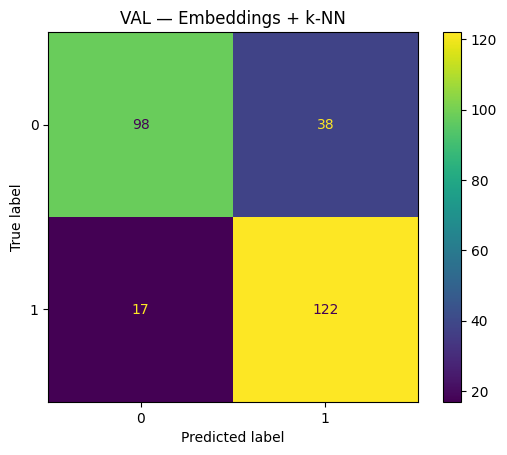

=== TEST (Embeddings + k-NN) ===
Acc: 0.8036363636363636
F1: 0.8032303955586398


In [ ]:
# Pipeline 4: Sentence Embeddings + k-NN (Similarity-Based ML)


try:
    from sentence_transformers import SentenceTransformer
except ImportError:

    from sentence_transformers import SentenceTransformer

embed_model = SentenceTransformer("all-MiniLM-L6-v2")

# Encode the data
Xtr_emb = embed_model.encode(X_train, show_progress_bar=True)
Xva_emb = embed_model.encode(X_val, show_progress_bar=True)
Xte_emb = embed_model.encode(X_test, show_progress_bar=True)

print("Shapes:", Xtr_emb.shape, Xva_emb.shape, Xte_emb.shape)

# k-NN classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=3,          # small values work well with embeddings
    metric="cosine"         # cosine distance matches semantic embeddings
)

knn.fit(Xtr_emb, y_train)

# Validation performance
pred_knn_val = knn.predict(Xva_emb)
acc_knn = accuracy_score(y_val, pred_knn_val)
f1_knn = f1_score(y_val, pred_knn_val, average="weighted")

print("=== VAL (Embeddings + k-NN) ===")
print("Acc:", round(acc_knn, 4), "F1:", round(f1_knn, 4))
print(classification_report(y_val, pred_knn_val))

ConfusionMatrixDisplay.from_predictions(y_val, pred_knn_val)
plt.title("VAL — Embeddings + k-NN")
plt.show()

# Test set
pred_knn_test = knn.predict(Xte_emb)
print("=== TEST (Embeddings + k-NN) ===")
print("Acc:", accuracy_score(y_test, pred_knn_test))
print("F1:", f1_score(y_test, pred_knn_test, average="weighted"))